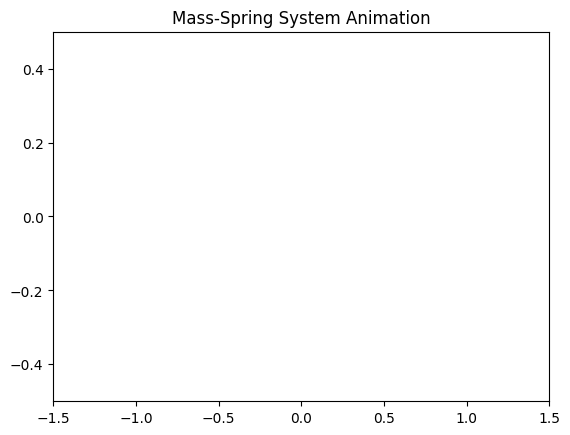

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
dt = 0.01  # Time step
T = 10     # Total simulation time
steps = int(T / dt)  # Number of iterations
m = 1.0    # Mass
k = 1.0    # Spring constant

# Initial conditions
x = 1.0    # Initial position
v = 0.0    # Initial velocity

# Storage for results
positions = []
times = np.arange(0, T, dt)

# Verlet Integration (More stable for animations)
x_old = x - v * dt  # Previous position for Verlet

for t in times:
    a = -k * x / m  # Compute acceleration (Hooke's Law)
    x_new = 2*x - x_old + a * dt**2  # Verlet integration

    x_old = x  # Update old position
    x = x_new  # Update current position

    positions.append(x)  # Store position

# ---------------------------- ANIMATION ----------------------------
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.5, 0.5)

# Mass representation
mass, = plt.plot([], [], 'bo', markersize=14)  # Blue ball for mass
spring, = plt.plot([], [], 'k-', lw=2)  # Spring line

def init():
    mass.set_data([], [])
    spring.set_data([], [])
    return mass, spring

def update(frame):
    x_pos = positions[frame]  # Get position at current frame
    mass.set_data(x_pos, 0)  # Update mass position
    spring.set_data([-1.5, x_pos], [0, 0])  # Spring from left to mass
    return mass, spring

ani = animation.FuncAnimation(fig, update, frames=len(times), init_func=init, blit=True, interval=10)
plt.title("Mass-Spring System Animation")
plt.show()
